# Timbre Analysis

This notebook compares the timbre of two violins quantitatively.

1. The first violin is a normal, wooden violin. 
2. The [second one is 3d-printed](https://timodenk.com/blog/3d-printed-violin).

They do sound quite different and the objective here is to quantify that, i.e., to make statements like _"the high frequency harmonics are more amplified for the wooden violin"_ or so.

In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal
from scipy.io import wavfile

In [2]:
notes = ['g', 'd', 'a', 'e']
freqs = [196., 293.7, 440., 659.3]  # frequences of the notes g, d, a, and e in Hz

In [3]:
wooden_wav_files = sorted(glob(os.path.join('samples', 'wooden-*.wav')))
printed_wav_files = sorted(glob(os.path.join('samples', 'printed-*.wav')))
assert len(wooden_wav_files) == 4 and len(printed_wav_files) == 4

Loading the `.wav` files. `wavfile.read` returns a tuple consisting of `sample_rate, samples`.

In [4]:
wooden_wav = [wavfile.read(p) for p in wooden_wav_files]
printed_wav = [wavfile.read(p) for p in printed_wav_files]
min_duration = min([samples.shape[0] for _, samples in wooden_wav + printed_wav])
min_duration

44018

**Spectrogram** computation

In [5]:
def get_spectrogram(sample_rate: int, wav_samples: np.array) -> (np.array, np.array):
    assert sample_rate == 44100
    num_samples = wav_samples.shape[0]  # total length of the audio segment in terms of samples
    assert num_samples > 22050, "Duration must be at least half a second"
    assert wav_samples.shape[1] == 2, "Number of channels must be two"
    
    print(f"Got sample of length {round(num_samples/sample_rate, 4)}s ", 
          f"cropping to {round (min_duration/sample_rate, 4)}s")
    num_samples = min_duration
    wav_samples_cropped = wav_samples[:min_duration, :]
    
    ch1 = wav_samples_cropped.T[0]
    ch2 = wav_samples_cropped.T[1]
    
    # nperseg=num_samples ensures that the spectrogram is computed over the entire length
    # so the time resolution will be only a single position
    freqs, _, spec1 = signal.spectrogram(ch1, sample_rate, nperseg=num_samples)
    freqs, _, spec2 = signal.spectrogram(ch2, sample_rate, nperseg=num_samples)
    
    # average spectrograms from both channels
    spectrogram = np.mean(np.array([spec1, spec2]), axis=0)[:, 0]
    spectrogram_normalized = spectrogram / np.linalg.norm(spectrogram)
    return freqs, spectrogram

In [6]:
wooden_spectrograms = [
    get_spectrogram(sample_rate, wav_samples)[1]
    for sample_rate, wav_samples in wooden_wav
]

printed_spectrograms = [
    get_spectrogram(sample_rate, wav_samples)[1]
    for sample_rate, wav_samples in printed_wav
]

Got sample of length 1.1498s  cropping to 0.9981s
Got sample of length 1.4237s  cropping to 0.9981s
Got sample of length 1.1756s  cropping to 0.9981s
Got sample of length 1.1051s  cropping to 0.9981s
Got sample of length 0.9981s  cropping to 0.9981s
Got sample of length 1.1557s  cropping to 0.9981s
Got sample of length 1.1312s  cropping to 0.9981s
Got sample of length 1.0781s  cropping to 0.9981s


We determine the frequencies of the spectrogram once, because they are the same for every audio sample, thanks to the cropping in duration that we do inside of `get_spectrogram`.

In [7]:
freqs = get_spectrogram(*wooden_wav[0])[0]
freqs

Got sample of length 1.1498s  cropping to 0.9981s


array([0.00000000e+00, 1.00186287e+00, 2.00372575e+00, ...,
       2.20479963e+04, 2.20489981e+04, 2.20500000e+04])

The frequencies range from 0 Hz up to 22 kHz.

### Examaple Visualization

Plotted below is the spectrogram of the wooden violin (blue) and the printed one (red) for the tone E.

Note:

* It is not clear (but important to find out) whether the open string was being played in both cases.
* Violins were not tuned to the same frequency, so the comparison in terms of absolute frequencies is not possible (which is no big deal, just worth mentioning).

In [8]:
x_offset = 500
x_width = 4000

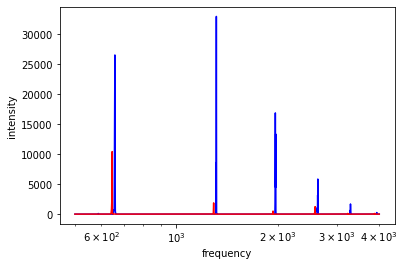

In [9]:
plt.plot(freqs[x_offset:x_width], wooden_spectrograms[3][x_offset:x_width], c='b')
plt.plot(freqs[x_offset:x_width], printed_spectrograms[3][x_offset:x_width], c='r')
plt.xscale('log'); plt.xlabel('frequency'); plt.ylabel('intensity');

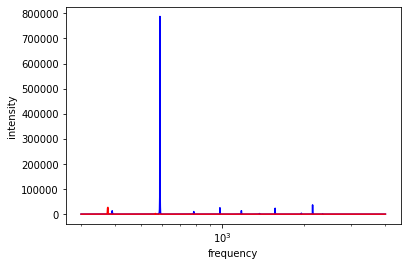

In [21]:
x_offset = 300
plt.plot(freqs[x_offset:x_width], wooden_spectrograms[0][x_offset:x_width], c='b')
plt.plot(freqs[x_offset:x_width], printed_spectrograms[0][x_offset:x_width], c='r')
plt.xscale('log'); plt.xlabel('frequency'); plt.ylabel('intensity');